## **AYO KEHINDE SAMUEL**

### **GRIP Task1**

### Prediction using Supervised ML.

In [91]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [92]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

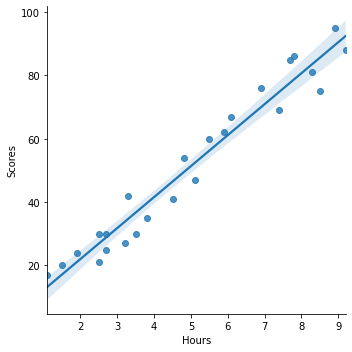

In [93]:
sns.lmplot(x='Hours', y='Scores', data=s_data)

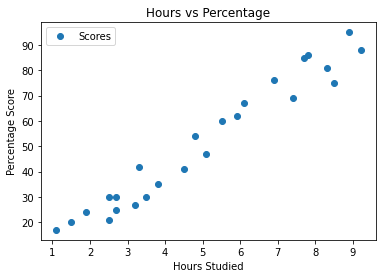

In [94]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Data Preparation**

Now, lets prepare our data for training. 
We have to first split our data into a feature x array sets to train on.
the dependent variable,y is our target.

In [95]:
X = s_data.iloc[:, :-1].values  
y = s_data['Scores'].values  

In [96]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


### Training the Model
Using scikit-learn regression module, We will split the train data into 60% train and 40% test

In [97]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.4, random_state=101) 

### **Training with the Algorithm**

In [98]:
from sklearn.linear_model import LinearRegression  
dt_regress = LinearRegression()  
dt_regress.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Lets evaluate the model by checking its co-efficient and how we can interpret it

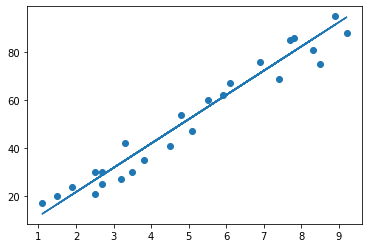

In [99]:
# Plotting the regression line
line = dt_regress.coef_*X+dt_regress.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [100]:
print(dt_regress.intercept_)

1.4459923890285964


In [101]:
print("A 1 unit increase in Area population is associated with an increase of :",dt_regress.coef_, "in Scores")

A 1 unit increase in Area population is associated with an increase of : [10.12298698] in Scores


### **Predicting with our model**

In [102]:
print(X_test) # Testing data - In Hours

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]
 [5.1]
 [1.1]]


In [103]:
y_pred = dt_regress.predict(X_test) # Predicting the scores

In [104]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,26.753460
1,85,79.392992
2,35,39.913343
3,69,76.356096
4,60,57.122421
5,54,50.036330
6,27,33.839551
7,75,87.491382
8,47,53.073226
9,17,12.581278


Lets create a visualization to draw the relationship between our text variable and predicted values

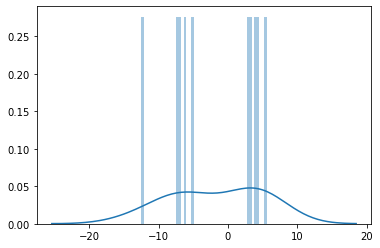

In [105]:
sns.distplot((y_test-y_pred), bins=50)

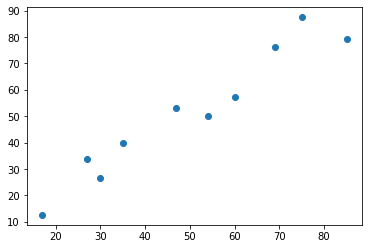

In [106]:
plt.scatter(y_test,y_pred)

In [107]:
# You can also test with your own data
hours = 9.25
hours=np.array(hours).reshape(-1,1)
own_pred = dt_regress.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 95.08362192697155


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [108]:
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root_mean_squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean absolute error: 5.778711665327945
mean squared error: 40.3446038605835
root_mean_squared error: 6.351740223008455
